In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [32]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [33]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [34]:
#looking at top 5 rows
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [35]:
#looking at bottom 5 rows
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5.How many rows and columns are in gdp_df? What are the data types of each column?

In [36]:
gdp_df.index

RangeIndex(start=0, stop=7662, step=1)

In [37]:
#searching row and column details
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


### 5 ANSWER: There are 7662 rows and there are 4 columns. Country is object, year is int64, value and value footnotes are float64

### 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [38]:
#deleted column
del(gdp_df['Value Footnotes'])

In [39]:
#rename columns
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)

In [40]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


#### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [41]:
gdp_df.count()

Country           7662
Year              7662
GDP_Per_Capita    7662
dtype: int64

In [42]:
gdp_df.value_counts('Country')

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

In [43]:
#### 7a. 242 countries show  data for all years
country_values = gdp_df['Country'].value_counts()

In [44]:
country_values

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [45]:
print(country_values)

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64


In [46]:
#### 7b. 40 countries show data for less than all the years
country_values.sort_values().head(40)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
SÃ£o TomÃ© and Principe      22
CuraÃ§ao                     22
Palau                        22
Qatar                        23
Other small states           23
Liberia                      23
Timor-Leste                  23
Libya                        24
San Marino                   25
Small states                 26
Montenegro                   26
Slovenia                     28
Croatia                      28
Maldives                     28
Moldova                      28
Iceland                      28
Lithuania                    28
Serbia                       28
Estonia                      28
Israel                       28
Latvia                       28
West Bank and Gaza           29
Bosnia and Herzegovina       29


### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?



In [47]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [48]:
#sort for 2020
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]

In [49]:
gdp_2020


,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


C:\Users\ymcmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

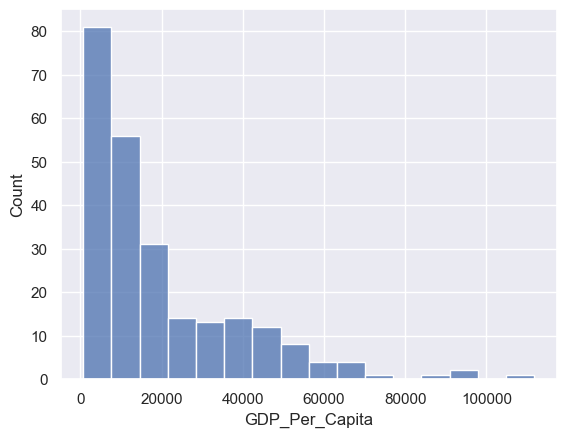

In [50]:
#histogram plot
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")

C:\Users\ymcmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

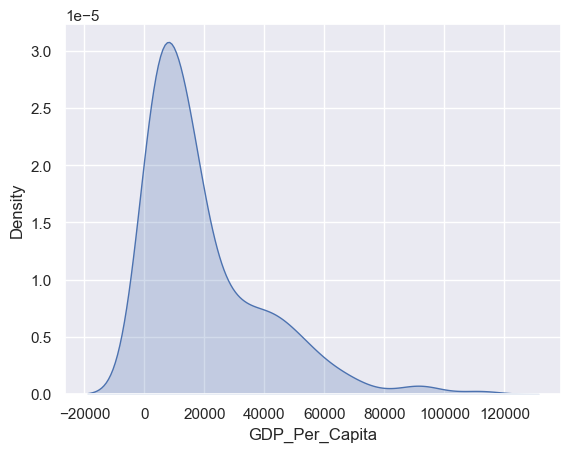

In [51]:
#density plot
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)

<Axes: xlabel='GDP_Per_Capita'>

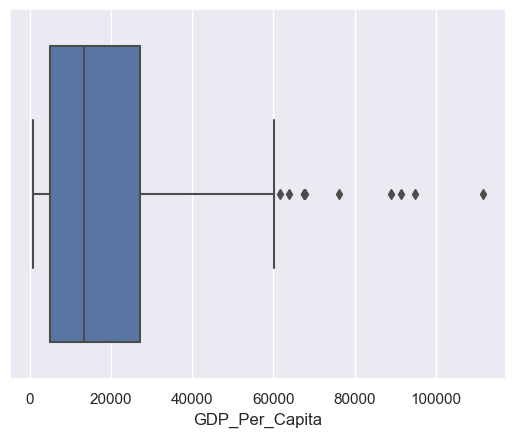

In [52]:
#box plot
sns.boxplot( x=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

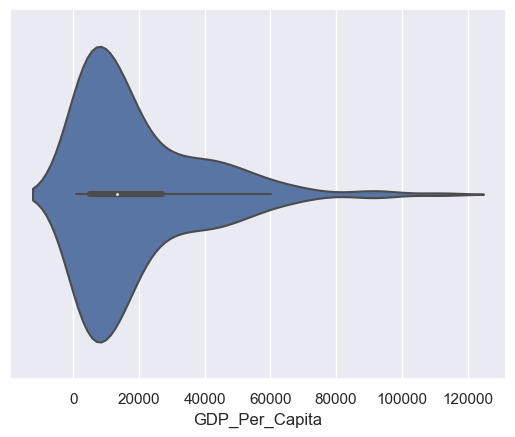

In [53]:
#Violin Plot
sns.violinplot(x=gdp_2020['GDP_Per_Capita'])

#### 9. What was the median GDP per capita value in 2020?

In [54]:
gdp_2020["GDP_Per_Capita"].median()

13357.997573370474

#### Answer: $13358

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 

#### 10a. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plotst


In [55]:
gdp_decades = gdp_df[(gdp_df['Year'] == 2020)| (gdp_df['Year'] ==2010) | (gdp_df['Year'] ==2000) | (gdp_df['Year'] ==1990)]

In [56]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

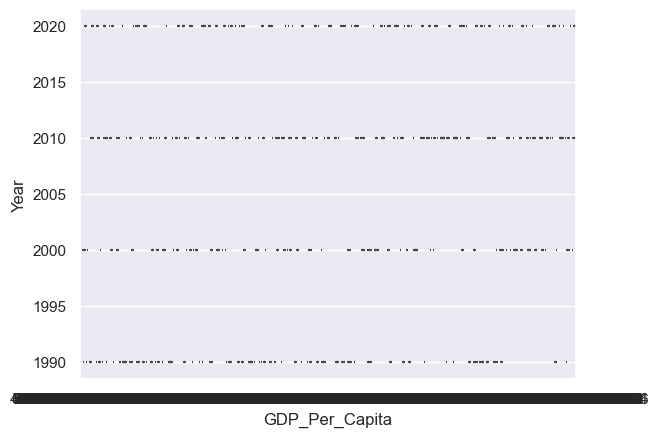

In [57]:
#box plot attempt 1
sns.boxplot( x=gdp_decades['GDP_Per_Capita'], y=gdp_decades['Year'])

<Axes: xlabel='GDP_Per_Capita'>

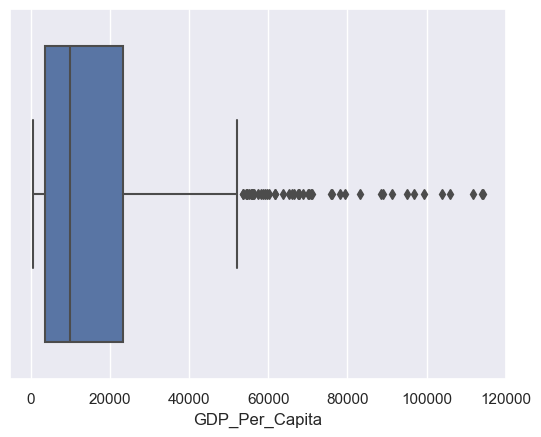

In [58]:
#attempt 2
sns.boxplot( x=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

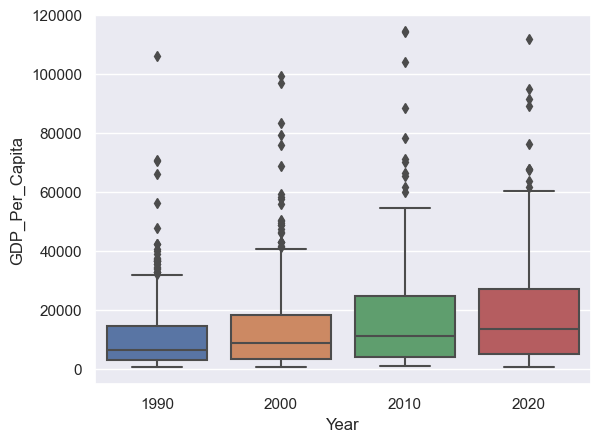

In [59]:
#box plot attempt 3 for the win- shows outliers- gdp has increased over time
sns.boxplot( x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

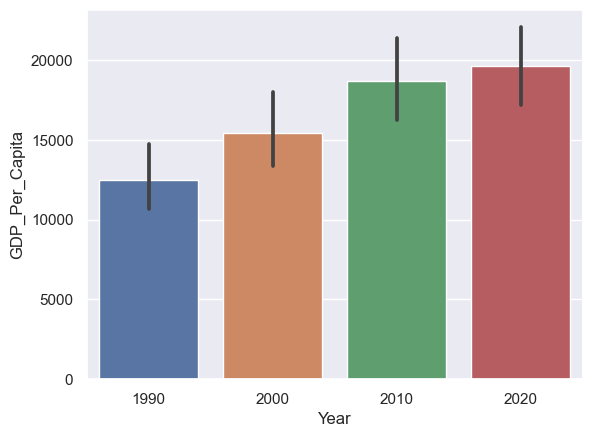

In [60]:
#bar plot gdp has increased over time- seems clearer and more straight forward addressing pertitnent data
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita",
     data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

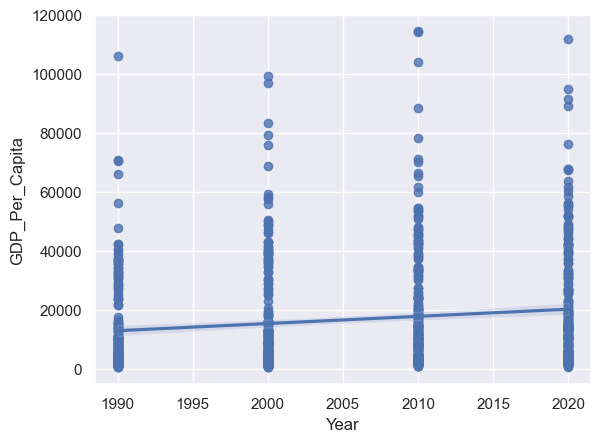

In [61]:
# scatter plot with trend line- shows trend but more difficult to read 
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

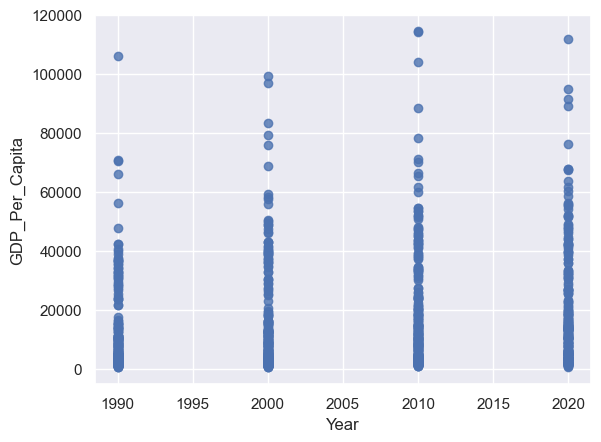

In [62]:
#scatter plot without trend line - can see the density of the dots and shows outliers but less attractive plot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"],fit_reg=False)

#### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [63]:
#gdp greater than 100k df[(df["col"] > 60) & (df["col"]  == "attribute")]
gdp100k = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]

In [64]:
gdp100k

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


In [65]:
gdp100k.groupby("Year").min()

,Country,GDP_Per_Capita
Year,,
1990,United Arab Emirates,105893.626059
1991,United Arab Emirates,101048.696239
1997,United Arab Emirates,100956.706467
2001,Luxembourg,101143.147977
2002,Luxembourg,103317.331098
2003,Luxembourg,104743.000088
2004,Luxembourg,107634.837198
2005,Luxembourg,108632.360016
2006,Luxembourg,113346.035782


#### Answer 11: United Arab Emirates

#### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [78]:
#df.groupby(column)["column"].agg([max, min])
gdp_2020.groupby('GDP_Per_Capita').max()

,Country,Year
GDP_Per_Capita,,
711.355263,Burundi,2020
847.765012,Central African Republic,2020
1044.071214,Dem. Rep. Congo,2020
1127.418534,Somalia,2020
1214.546556,Niger,2020
...,...,...
76117.804744,Bermuda,2020
89019.069857,Qatar,2020
91356.855054,Ireland,2020


In [86]:
gdp_2020['GDP_Per_Capita'].max()

111751.3147513618

#### Answer: Luxembourg

In [88]:
luxembourg_df = gdp_df[gdp_df['Country'] == 'Luxembourg']

In [89]:
luxembourg_df

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


C:\Users\ymcmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ymcmu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

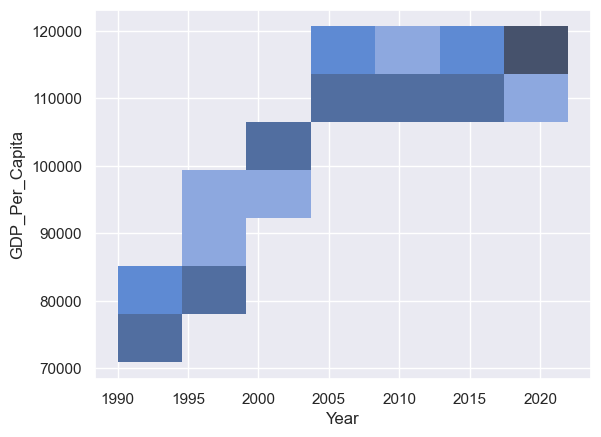

In [92]:
#sns.histplot(data=gdp_2020, x="GDP_Per_Capita")
sns.histplot(data=luxembourg_df, x="Year", y="GDP_Per_Capita")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

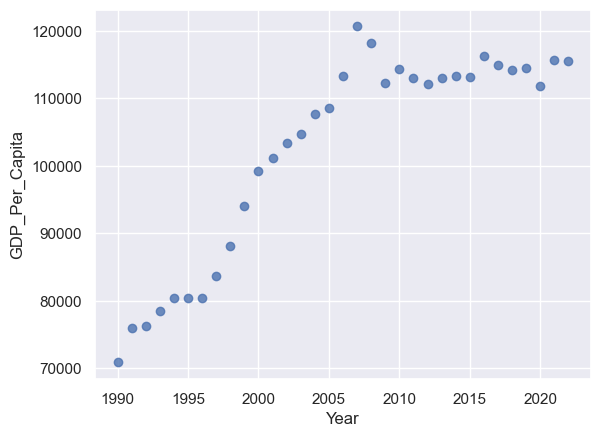

In [95]:
sns.regplot(x=luxembourg_df["Year"], y=luxembourg_df["GDP_Per_Capita"],fit_reg=False)

#### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [96]:
gdp_2020['GDP_Per_Capita'].min()

711.355263423169

In [97]:
gdp_2020.groupby('GDP_Per_Capita').min()

,Country,Year
GDP_Per_Capita,,
711.355263,Burundi,2020
847.765012,Central African Republic,2020
1044.071214,Dem. Rep. Congo,2020
1127.418534,Somalia,2020
1214.546556,Niger,2020
...,...,...
76117.804744,Bermuda,2020
89019.069857,Qatar,2020
91356.855054,Ireland,2020


#### Answer: Burundi

In [98]:
burundi_df = gdp_df[gdp_df['Country'] == 'Burundi']

In [99]:
burundi_df

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

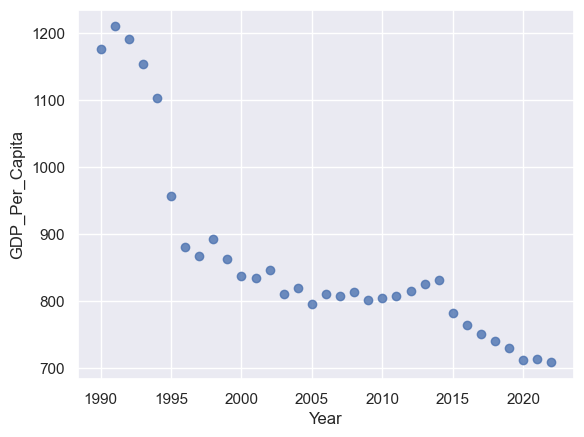

In [100]:
sns.regplot(x=burundi_df["Year"], y=burundi_df["GDP_Per_Capita"],fit_reg=False)

In [101]:
#Bonus- unsuccessful
gdp_1990 = gdp_df.loc[gdp_df['Year'] == 1990]

In [103]:
gdp_df["lower_2020_gdp?"] = gdp_2020["GDP_Per_Capita"] < gdp_1990["GDP_Per_Capita"]

ValueError: Can only compare identically-labeled Series objects

#### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors 

In [109]:
internet_df

NameError: name 'internet_df' is not defined

In [137]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [138]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [139]:
#searching row and column details
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


#### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [140]:
del(internet_df['Value Footnotes'])

In [141]:
internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'}, inplace=True)

In [142]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [143]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [144]:
internet_df.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


In [145]:
internet_df.head(100)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
95,Angola,1997,0.005674
96,Angola,1996,0.000776
97,Angola,1990,0.000000
98,Antigua and Barbuda,2014,64.000000


#### 16. Look at the number of observations in this dataset per year. What do you notice?

In [149]:
internet_df.groupby('Year')['Year'].value_counts()
#there are some inputs for years before the internet was available publicly. then after the boom in 1990, 
#there is a drop of records

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: count, dtype: int64

#### 17. What is the first year to have a non-zero internet users percentage value?

In [154]:
internet_df[internet_df["Internet_Users_Pct"]  != 0].min()

Country               Afghanistan
Year                         1990
Internet_Users_Pct       0.000017
dtype: object

#### Answer 1990- Afghanistan

#### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [155]:
internet_2000 = internet_df.loc[internet_df['Year'] == 2000]

In [156]:
internet_2014 = internet_df.loc[internet_df['Year'] == 2014]

In [160]:
internet_2000.sort_values('Country')

,Country,Year,Internet_Users_Pct
29,Albania,2000,0.114097
50,Algeria,2000,0.491706
72,Andorra,2000,10.538836
92,Angola,2000,0.105046
112,Antigua and Barbuda,2000,6.482226
...,...,...,...
4403,Viet Nam,2000,0.254248
4423,Virgin Islands (U.S.),2000,13.815081
4445,Yemen,2000,0.082500
4465,Zambia,2000,0.191072


In [161]:
internet_2014.sort_values('Country')

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
15,Albania,2014,60.10
36,Algeria,2014,18.09
59,Andorra,2014,95.90
78,Angola,2014,21.26
...,...,...,...
4389,Viet Nam,2014,48.31
4409,Virgin Islands (U.S.),2014,50.07
4431,Yemen,2014,22.55
4451,Zambia,2014,17.34


#### ANSWER: there are more countries in 2014 using the internet (4 more) and the percentage of users is much higher.

#### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [162]:
under_5_internet_2014 = internet_2014[internet_2014['Internet_Users_Pct'] < 5]

In [166]:
under_5_internet_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 623 to 4019
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16 non-null     object 
 1   Year                16 non-null     int64  
 2   Internet_Users_Pct  16 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


#### 16 countries

#### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [167]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'])

In [168]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2144.449634,6.390000
1,Afghanistan,2013,2165.340915,5.900000
2,Afghanistan,2012,2122.830759,5.454545
3,Afghanistan,2011,1961.096317,5.000000
4,Afghanistan,2010,2026.163818,4.000000
...,...,...,...,...
3416,Zimbabwe,1997,2896.147308,0.033080
3417,Zimbabwe,1996,2867.026043,0.016790
3418,Zimbabwe,1995,2641.378271,0.007684
3419,Zimbabwe,1994,2670.106615,0.001739


In [169]:
gdp_df.head(10)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759
